In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('winequality-red.csv')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data.shape

(1599, 12)

In [5]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
import seaborn as sns

<AxesSubplot:>

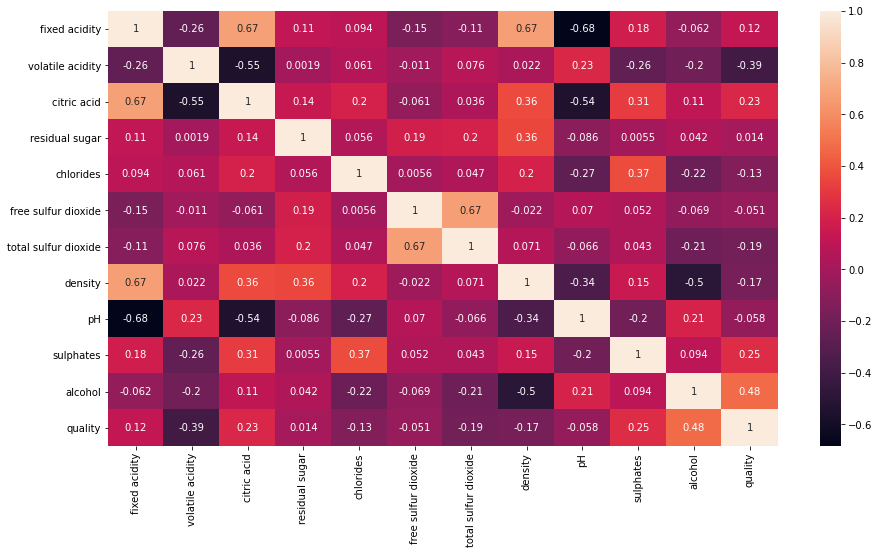

In [8]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(),annot=True)

In [9]:
x=data[['fixed acidity','volatile acidity','citric acid','chlorides','total sulfur dioxide','density','sulphates','alcohol']]
y=data['quality']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
# from sklearn.preprocessing import StandardScaler
# stdscale=StandardScaler().fit(X_train)
# x_train_std=stdscale.transform(X_train)
# x_test_std=stdscale.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=42)

In [13]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=42)

In [14]:
ypred=model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(ypred,y_test)

0.659375

In [17]:
import pickle 
pickle.dump(model,open('mod1.pkl','wb'))